# Step 1: Import Libraries

In [127]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LSTM, GRU
print("All libraries have been imported")

All libraries have been imported


# Step 2: Load the Dataset

In [128]:
df = pd.read_csv('Crudeoil.csv')

# Step 3: Explore the Dataset

Display the first 10 rows of the dataset

In [129]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,79.629997,81.680000,79.629997,81.510002,81.510002,120372.0
1,2010-01-05,81.629997,82.000000,80.949997,81.769997,81.769997,263542.0
2,2010-01-06,81.430000,83.519997,80.849998,83.180000,83.180000,258887.0
3,2010-01-07,83.199997,83.360001,82.260002,82.660004,82.660004,370059.0
4,2010-01-08,82.650002,83.470001,81.800003,82.750000,82.750000,246632.0
5,2010-01-10,NaN,NaN,NaN,NaN,NaN,NaN
6,2010-01-11,82.879997,83.949997,81.959999,82.519997,82.519997,310377.0
7,2010-01-12,82.070000,82.339996,79.910004,80.790001,80.790001,296304.0
8,2010-01-13,80.059998,80.669998,78.370003,79.650002,79.650002,333866.0
9,2010-01-14,79.629997,80.360001,78.919998,79.389999,79.389999,401627.0


Check the shape of the dataset

In [130]:
df.shape

(3038, 7)

Check the data types of each column

In [131]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3038 entries, 0 to 3037
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3038 non-null   object 
 1   Open       2495 non-null   float64
 2   High       2495 non-null   float64
 3   Low        2495 non-null   float64
 4   Close      2495 non-null   float64
 5   Adj Close  2495 non-null   float64
 6   Volume     2495 non-null   float64
dtypes: float64(6), object(1)
memory usage: 166.3+ KB


Summary statistics

In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2495.0,72.514549,21.903052,27.299999,52.365000,71.389999,93.489998,1.138900e+02
High,2495.0,73.433856,21.967196,27.480000,53.199999,72.290001,94.444999,1.148300e+02
Low,2495.0,71.494786,21.783320,26.049999,51.409999,70.559998,92.609996,1.122500e+02
Close,2495.0,72.497194,21.915345,26.209999,52.365000,71.339996,93.535000,1.139300e+02
Adj Close,2495.0,72.497194,21.915345,26.209999,52.365000,71.339996,93.535000,1.139300e+02
Volume,2495.0,420210.080561,213220.944451,48516.000000,255598.500000,356179.000000,566820.000000,1.404916e+06


# Step 3: Data cleaning and preprocessing


Check the missing value

In [134]:
df.isnull().sum()

Date           0
Open         543
High         543
Low          543
Close        543
Adj Close    543
Volume       543
dtype: int64

Drop rows with missing values

In [135]:
df.dropna(inplace=True)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,79.629997,81.680000,79.629997,81.510002,81.510002,120372.0
1,2010-01-05,81.629997,82.000000,80.949997,81.769997,81.769997,263542.0
2,2010-01-06,81.430000,83.519997,80.849998,83.180000,83.180000,258887.0
3,2010-01-07,83.199997,83.360001,82.260002,82.660004,82.660004,370059.0
4,2010-01-08,82.650002,83.470001,81.800003,82.750000,82.750000,246632.0
6,2010-01-11,82.879997,83.949997,81.959999,82.519997,82.519997,310377.0
7,2010-01-12,82.070000,82.339996,79.910004,80.790001,80.790001,296304.0
8,2010-01-13,80.059998,80.669998,78.370003,79.650002,79.650002,333866.0
9,2010-01-14,79.629997,80.360001,78.919998,79.389999,79.389999,401627.0
10,2010-01-15,79.199997,79.309998,77.699997,78.000000,78.000000,275404.0


In [136]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,79.629997,81.680000,79.629997,81.510002,81.510002,120372.0
2010-01-05,81.629997,82.000000,80.949997,81.769997,81.769997,263542.0
2010-01-06,81.430000,83.519997,80.849998,83.180000,83.180000,258887.0
2010-01-07,83.199997,83.360001,82.260002,82.660004,82.660004,370059.0
2010-01-08,82.650002,83.470001,81.800003,82.750000,82.750000,246632.0
2010-01-11,82.879997,83.949997,81.959999,82.519997,82.519997,310377.0
2010-01-12,82.070000,82.339996,79.910004,80.790001,80.790001,296304.0
2010-01-13,80.059998,80.669998,78.370003,79.650002,79.650002,333866.0
2010-01-14,79.629997,80.360001,78.919998,79.389999,79.389999,401627.0


In [137]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Split the data into training and testing sets

In [138]:
len(df)

2495

In [139]:
train_size = int(len(df) * 0.8)
test_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]


In [140]:
train_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,79.629997,81.680000,79.629997,81.510002,81.510002,120372.0
2010-01-05,81.629997,82.000000,80.949997,81.769997,81.769997,263542.0
2010-01-06,81.430000,83.519997,80.849998,83.180000,83.180000,258887.0
2010-01-07,83.199997,83.360001,82.260002,82.660004,82.660004,370059.0
2010-01-08,82.650002,83.470001,81.800003,82.750000,82.750000,246632.0
...,...,...,...,...,...,...
2017-12-20,57.660000,58.119999,57.439999,58.090000,58.090000,420784.0
2017-12-21,58.020000,58.380001,57.630001,58.360001,58.360001,420844.0
2017-12-22,58.209999,58.500000,57.869999,58.470001,58.470001,405320.0


In [141]:
test_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-28,59.529999,59.939999,59.439999,59.840000,59.840000,402396.0
2017-12-29,59.910000,60.509998,59.820000,60.419998,60.419998,345962.0
2018-01-02,60.200001,60.740002,60.099998,60.369999,60.369999,464478.0
2018-01-03,60.389999,61.970001,60.279999,61.630001,61.630001,510313.0
2018-01-04,61.959999,62.209999,61.590000,62.009998,62.009998,673859.0
...,...,...,...,...,...,...
2019-12-23,60.410000,60.770000,60.099998,60.520000,60.520000,552517.0
2019-12-26,61.200001,61.830002,61.060001,61.680000,61.680000,204535.0
2019-12-27,61.730000,61.970001,61.240002,61.720001,61.720001,265091.0


In [142]:
print(train_size)
print(test_size)
print(train_data.shape)
print(test_data.shape)

1996
1996
(1996, 6)
(499, 6)


# Scale the data

In [143]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

# Define the window size

In [144]:
window_size = 10

# Create input and output data for ANN

In [145]:
X_train_ann = []
y_train_ann = []
X_test_ann = []
y_test_ann = []

for i in range(window_size, len(scaled_train_data)):
    X_train_ann.append(scaled_train_data[i-window_size:i, 0])
    y_train_ann.append(scaled_train_data[i, 0])

for i in range(window_size, len(scaled_test_data)):
    X_test_ann.append(scaled_test_data[i-window_size:i, 0])
    y_test_ann.append(scaled_test_data[i, 0])

X_train_ann, y_train_ann = np.array(X_train_ann), np.array(y_train_ann)
X_test_ann, y_test_ann = np.array(X_test_ann), np.array(y_test_ann)

# Reshape the input data for ANN

In [146]:
X_train_ann = np.reshape(X_train_ann, (X_train_ann.shape[0], X_train_ann.shape[1], 1))
X_test_ann = np.reshape(X_test_ann, (X_test_ann.shape[0], X_test_ann.shape[1], 1))

# Create and train the ANN model

In [147]:
model_ann = Sequential()
model_ann.add(Dense(32, activation='relu', input_shape=(window_size, 1)))
model_ann.add(Dense(1))
model_ann.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = model_ann.fit(X_train_ann, y_train_ann, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
1986/1986 [==============================] - 4s 2ms/step - loss: 0.0068
Epoch 2/100
1986/1986 [==============================] - 3s 2ms/step - loss: 0.0014
Epoch 3/100
1986/1986 [==============================] - 3s 2ms/step - loss: 0.0015
Epoch 4/100
1986/1986 [==============================] - 3s 2ms/step - loss: 0.0015
Epoch 4: early stopping


# Create input and output data for LSTM and GRU

In [148]:
X_train_rnn = X_train_ann
y_train_rnn = y_train_ann
X_test_rnn = X_test_ann
y_test_rnn = y_test_ann

# Create and train the LSTM model

In [149]:
model_lstm = Sequential()
model_lstm.add(LSTM(32, activation='relu', input_shape=(window_size, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = model_lstm.fit(X_train_rnn, y_train_rnn, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
1986/1986 [==============================] - 8s 3ms/step - loss: 0.0036
Epoch 2/100
1986/1986 [==============================] - 7s 4ms/step - loss: 0.0012
Epoch 3/100
1986/1986 [==============================] - 7s 4ms/step - loss: 0.0013
Epoch 4/100
1986/1986 [==============================] - 7s 4ms/step - loss: 0.0013
Epoch 4: early stopping


# Create and train the GRU model

In [150]:
model_gru = Sequential()
model_gru.add(GRU(32, activation='relu', input_shape=(window_size, 1)))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = model_gru.fit(X_train_rnn, y_train_rnn, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
1986/1986 [==============================] - 10s 4ms/step - loss: 0.0048
Epoch 2/100
1986/1986 [==============================] - 8s 4ms/step - loss: 8.2042e-04
Epoch 3/100
1986/1986 [==============================] - 8s 4ms/step - loss: 8.0727e-04
Epoch 4/100
1986/1986 [==============================] - 8s 4ms/step - loss: 8.0180e-04
Epoch 5/100
1986/1986 [==============================] - 8s 4ms/step - loss: 7.7628e-04
Epoch 6/100
1986/1986 [==============================] - 8s 4ms/step - loss: 7.1195e-04
Epoch 7/100
1986/1986 [==============================] - 8s 4ms/step - loss: 6.6877e-04
Epoch 8/100
1986/1986 [==============================] - 8s 4ms/step - loss: 6.2356e-04
Epoch 9/100
1986/1986 [==============================] - 8s 4ms/step - loss: 5.7889e-04
Epoch 10/100
1986/1986 [==============================] - 7s 4ms/step - loss: 5.2823e-04
Epoch 11/100
1986/1986 [==============================] - 7s 4ms/step - loss: 5.3863e-04
Epoch 12/100
1986/1986 [=========

# Make predictions


In [151]:
train_predictions_ann = model_ann.predict(X_train_ann)
test_predictions_ann = model_ann.predict(X_test_ann)

train_predictions_lstm = model_lstm.predict(X_train_rnn)
test_predictions_lstm = model_lstm.predict(X_test_rnn)

train_predictions_gru = model_gru.predict(X_train_rnn)
test_predictions_gru = model_gru.predict(X_test_rnn)

16/16 [==============================] - 0s 3ms/step


In [152]:
print(train_predictions_lstm.size)
print(test_predictions_lstm.size)
print(train_predictions_gru.size)
print(test_predictions_gru.size )

1986
489
1986
489


# Inverse scale the predictions

In [153]:
# Assuming the scaler object was initially fit on the original dataset with 6 features
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df) # Fit the scaler on the original dataset

# Reshape the array to have the same number of features as the scaler object
train_predictions_ann = train_predictions_ann.reshape(-1, 6)
test_predictions_ann = test_predictions_ann.reshape(-1, 6)
n1 = train_predictions_lstm.size // 6  # Calculate the value of n
n2 = test_predictions_lstm.size // 6  # Calculate the value of n
train_predictions_lstm = train_predictions_lstm[:n1*6].reshape(n1, 6)
test_predictions_lstm = test_predictions_lstm[:n2*6].reshape(n2, 6)
n3 = train_predictions_gru.size // 6  # Calculate the value of n
n4 = test_predictions_gru.size // 6  # Calculate the value of n
train_predictions_gru= train_predictions_gru[:n3*6].reshape(n3, 6)
test_predictions_gru = test_predictions_gru[:n4*6].reshape(n4, 6)



In [154]:
train_predictions_ann = scaler.inverse_transform(train_predictions_ann)
test_predictions_ann = scaler.inverse_transform(test_predictions_ann)

train_predictions_lstm = scaler.inverse_transform(train_predictions_lstm)
test_predictions_lstm = scaler.inverse_transform(test_predictions_lstm)



In [155]:
train_predictions_gru = scaler.inverse_transform(train_predictions_gru)
test_predictions_gru = scaler.inverse_transform(test_predictions_gru)

# Plot the results

In [156]:
print(train_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [157]:
print(train_data.shape)
print(test_data.shape)

(1996, 6)
(499, 6)


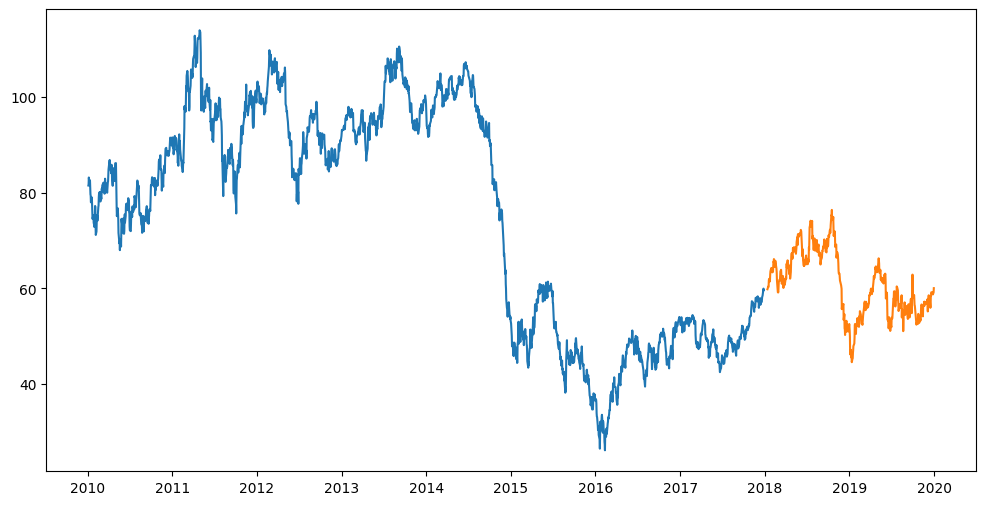

In [158]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[:train_size], train_data['Adj Close'], label='Training Data')
plt.plot(df.index[train_size+window_size:train_size+window_size+len(test_data)-10], test_data['Adj Close'][:len(test_data)-10], label='Test Data')

ValueError: x and y must have same first dimension, but have shapes (489,) and (815, 6)

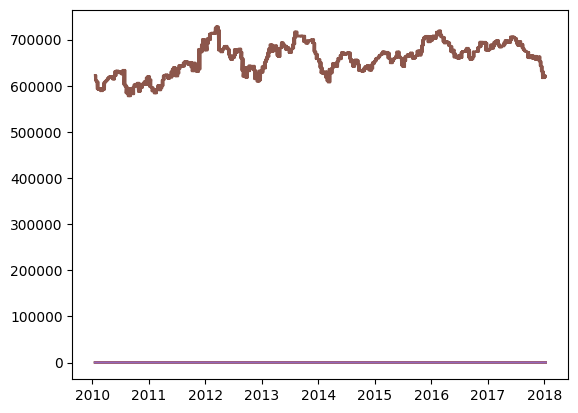

In [126]:
plt.plot(df.index[window_size:window_size+train_size], train_predictions_ann[:train_size], label='ANN Predictions')
plt.plot(df.index[window_size+train_size:window_size+train_size+test_size], test_predictions_ann[:test_size], label='ANN Test Predictions')

ValueError: x and y must have same first dimension, but have shapes (489,) and (499,)

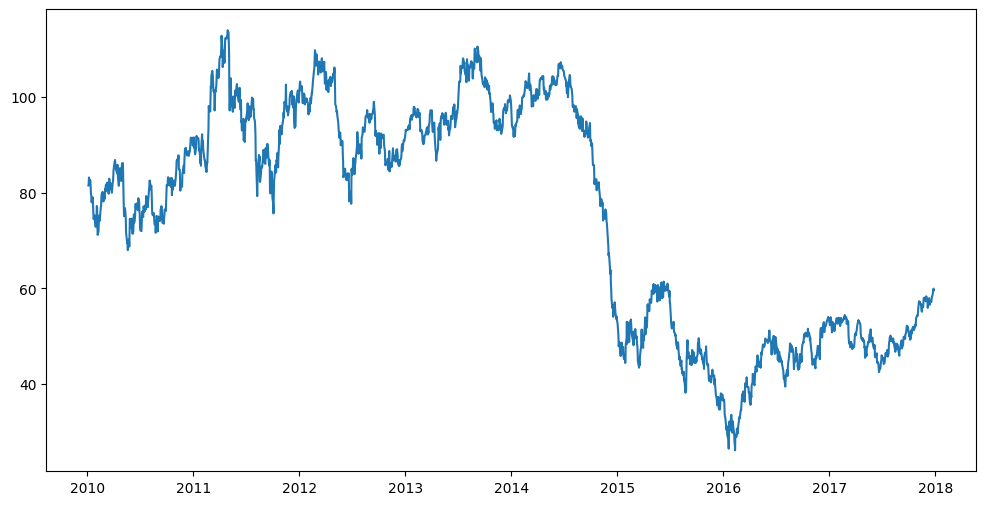

In [104]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[:train_size], train_data['Adj Close'], label='Training Data')
plt.plot(df.index[train_size+window_size:train_size+window_size+len(test_data[:train_size])], test_data[:train_size]['Adj Close'], label='Test Data')
plt.plot(df.index[window_size:train_size], train_predictions_ann, label='ANN Predictions')
plt.plot(df.index[train_size+window_size:train_size+window_size+len(test_predictions_ann)], test_predictions_ann, label='ANN Test Predictions')

ValueError: x and y must have same first dimension, but have shapes (489,) and (499,)

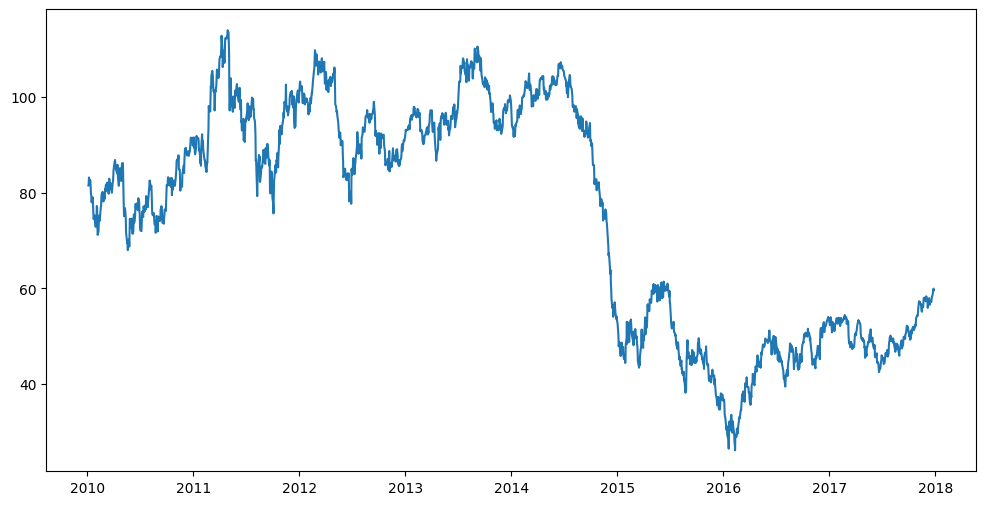

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[:train_size], train_data['Adj Close'], label='Training Data')
plt.plot(df.index[train_size+window_size:], test_data['Adj Close'], label='Test Data')
plt.plot(df.index[window_size:train_size], train_predictions_ann, label='ANN Predictions')
plt.plot(df.index[train_size+window_size:], test_predictions_ann, label='ANN Test Predictions')
plt.plot(df.index[window_size:train_size], train_predictions_lstm, label='LSTM Predictions')
plt.plot(df.index[train_size+window_size:], test_predictions_lstm, label='LSTM Test Predictions')
plt.plot(df.index[window_size:train_size], train_predictions_gru, label='GRU Predictions')
plt.plot(df.index[train_size+window_size:], test_predictions_gru, label='GRU Test Predictions')
plt.title('Crude Oil Price Forecasting')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.show()